In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


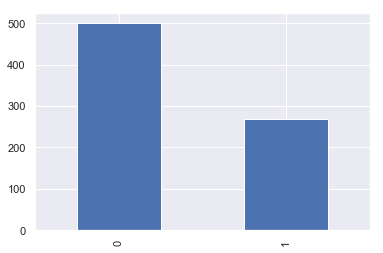

In [3]:
df['Outcome'].value_counts().plot(kind="bar")

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis = 1).to_numpy()
y = df['Outcome'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [5]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 24.64625156083578


In [6]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [7]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([  2.   , 108.   ,  62.   ,  10.   , 278.   ,  25.3  ,   0.881,
          22.   ]), 0, 16.890272022676246],
 [array([0.00e+00, 1.14e+02, 8.00e+01, 3.40e+01, 2.85e+02, 4.42e+01,
         1.67e-01, 2.70e+01]), 0, 41.97856368433775],
 [array([  0.   , 134.   ,  58.   ,  20.   , 291.   ,  26.4  ,   0.352,
          21.   ]), 0, 42.271842212044646],
 [array([  4.   , 129.   ,  60.   ,  12.   , 231.   ,  27.5  ,   0.527,
          31.   ]), 0, 45.253702268433244],
 [array([  3.   , 126.   ,  88.   ,  41.   , 235.   ,  39.3  ,   0.704,
          27.   ]), 0, 56.97383697803756]]

In [8]:
y_test[-1]

0

In [9]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [10]:
KNN_Predict(X_test[-1], X_train, y_train, 5)

0

In [11]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/len(test_features)

In [12]:
classification_error(X_test, y_test, X_train, y_train, 7)

0.31496062992125984

In [13]:
possible_k = [x for x in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

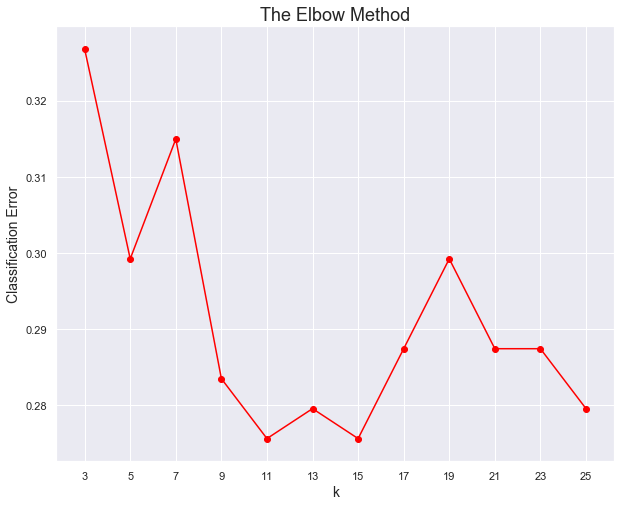

In [14]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.title("The Elbow Method", fontsize = 18)
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 11)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [16]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0] 

y_pred == y_test = [ True  True  True  True False  True  True  True  True False  True False
 False  True  True  True  True  True  True False False  True  True  True
 False  True  True  True False  True  True False  True  True  True  True
  True False  True False  True  True  True  True  True  True  True  True
 False False  True  True False False  True  True False  True  True  True
 False  True  True False  True  True  True False  True  True  True  True
  T

In [17]:
clf.score(X_test, y_test)

0.7244094488188977

cf_matrix = [[128  40]
 [ 40  46]]
 


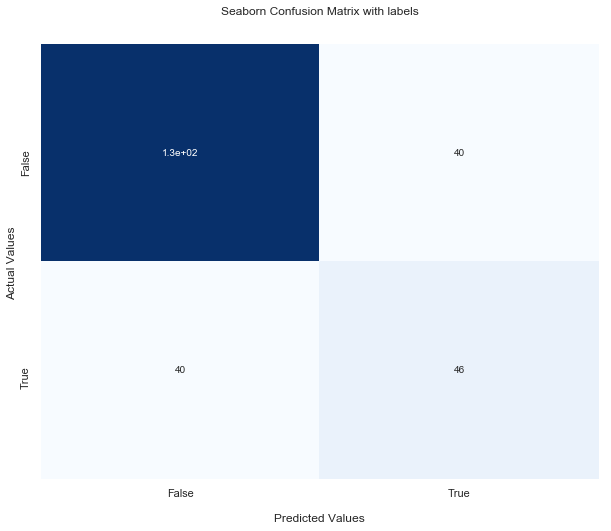

In [19]:
from sklearn.metrics import confusion_matrix

clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train,y_train)#Generate predictions with the model using our X values
y_pred = clf.predict(X_test)#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"cf_matrix = {cf_matrix}\n ")


plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       168
           1       0.53      0.53      0.53        86

    accuracy                           0.69       254
   macro avg       0.65      0.65      0.65       254
weighted avg       0.69      0.69      0.69       254

